In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [4]:
rgbFile  = './data_ignore/L2_RGB.tif'
grayFile = './data_ignore/1m_res/1m_latlon.tif'
demFile  = './data_ignore/L2_DEM.tif'

# Visual Data

* RGB Image

+++++++++++++++++++++++
Bounds: BoundingBox(left=23.771180236189803, bottom=37.92479985657686, right=23.880607875, top=37.85710516561014)
Number of bands: 4
Driver: GTiff
Tags: {'AREA_OR_POINT': 'Area'}


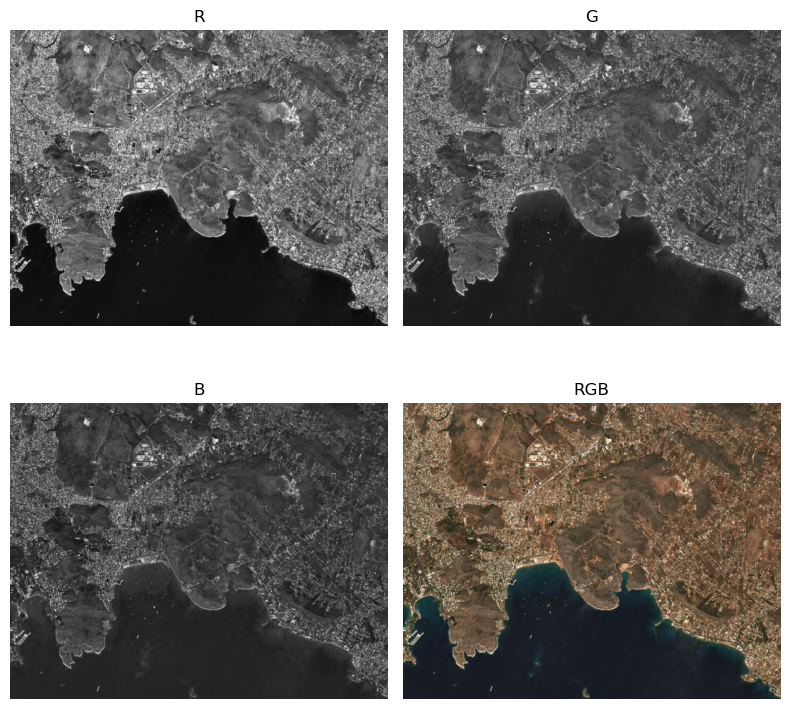

In [5]:
# Open the GeoTIFF file
src = rasterio.open(rgbFile)
print("+++++++++++++++++++++++")
print("Bounds:", src.bounds)               # Geographic bounds
print("Number of bands:", src.count)
print("Driver:", src.driver)
print("Tags:", src.tags())                 # Additional metadata tags

transform = src.transform
bounds = src.bounds
width, height = src.width, src.height

# Reconstruct bounding box from transform
left, top = transform * (0, 0)
right, bottom = transform * (width, height)


# Taking the three bands as the Red green and blue components
R = src.read(1)
G = src.read(2)
B = src.read(3)
RGB = np.transpose(np.stack([R,G,B]),(1,2,0))


# Plotting  the dataset
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Display images
axes[0, 0].imshow((R*(0xff/0xffff)).astype(int), cmap='gray')
axes[0, 0].set_title('R'); axes[0, 0].axis('off')

axes[0, 1].imshow((G*(0xff/0xffff)).astype(int), cmap='gray')
axes[0, 1].set_title('G'); axes[0, 1].axis('off')

axes[1, 0].imshow((B*(0xff/0xffff)).astype(int), cmap='gray')
axes[1, 0].set_title('B'); axes[1, 0].axis('off')

axes[1, 1].imshow((RGB*(0xff/0xffff)).astype(int), cmap='gray')
axes[1, 1].set_title('RGB'); axes[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

* Gray image

+++++++++++++++++++++++
Bounds: BoundingBox(left=23.750880400868688, bottom=37.65239209143433, right=23.865578624978372, top=37.924990168649806)
Number of bands: 1
Driver: GTiff
Tags: {'AREA_OR_POINT': 'Area'}


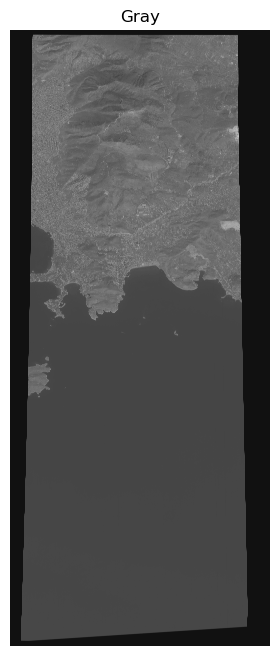

In [29]:
# Open the GeoTIFF file
src = rasterio.open(grayFile)
print("+++++++++++++++++++++++")
print("Bounds:", src.bounds)               # Geographic bounds
print("Number of bands:", src.count)
print("Driver:", src.driver)
print("Tags:", src.tags())                 # Additional metadata tags

transform = src.transform
bounds = src.bounds
width, height = src.width, src.height

# Reconstruct bounding box from transform
left, top = transform * (0, 0)
right, bottom = transform * (width, height)


# Taking the three bands as the Red green and blue components
gray = src.read(1)


# Plotting  the dataset
# Create a 2x2 subplot
plt.figure(figsize=(8, 8))

# Display images
plt.imshow(gray, cmap='gray')
plt.title('Gray')
plt.axis('off')

# Adjust layout
plt.show()

# Exploring the DEM dataset

+++++++++++++++++++++++
Bounds: BoundingBox(left=23.771180236189803, bottom=37.92479985657686, right=23.880607875, top=37.85710516561014)
Number of bands: 4
Driver: GTiff
Tags: {'AREA_OR_POINT': 'Area'}


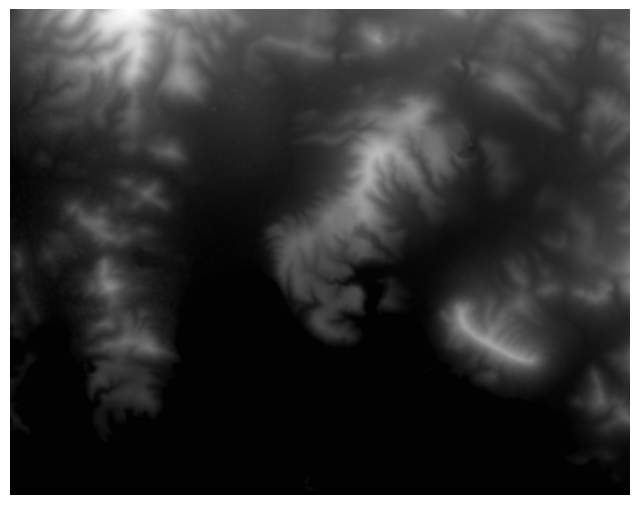

In [23]:

# Open the GeoTIFF file
src = rasterio.open(demFile)
print("+++++++++++++++++++++++")
print("Bounds:", src.bounds)               # Geographic bounds
print("Number of bands:", src.count)
print("Driver:", src.driver)
print("Tags:", src.tags())                 # Additional metadata tags

transform     = src.transform
bounds        = src.bounds
width, height = src.width, src.height

# Reconstruct bounding box from transform
left, top = transform * (0, 0)
right, bottom = transform * (width, height)

# Taking the three bands as the Red green and blue components
DEM = src.read(1)


# Plotting  the dataset
# Create a 2x2 subplot
fig = plt.figure(figsize=(8,8))
plt.imshow(DEM, cmap='gray')
plt.axis('off')
plt.show()

In [25]:
src.crs.data

{'proj': 'longlat', 'datum': 'WGS84', 'no_defs': True}